# *Project*
### Real-time face detection- Cyber Security

**Problem Statement: Build an application to detect face using opencv (Dataset not required / using webcam)**

**What is Face Detection?**

Face detection involves identifying a person’s face in an image or video. 
This is done by analyzing the visual input to determine whether a person’s facial features are present.
Since human faces are so diverse, face detection models typically need to be trained on large amounts of input data for them to be accurate. The training dataset must contain a sufficient representation of people who come from different backgrounds, genders, and cultures.
These algorithms also need to be fed many training samples comprising different lighting, angles, and orientations to make correct predictions in real-world scenarios.
These nuances make face detection a non-trivial, time-consuming task that requires hours of model training and millions of data samples.
Thankfully, the OpenCV package comes with pre-trained models for face detection, which means that we don’t have to train an algorithm from scratch. More specifically, the library employs a machine learning approach called Haar cascade to identify objects in visual data.

# **Installing OpenCV for Python**
***To install the OpenCV library, simply run the following command:***

In [8]:
pip install opencv-python

### **Installing OpenCV for Package**

**Now, let’s import OpenCV and enter the input image path with the following lines of code**

In [2]:
import cv2

In [3]:
webcam = cv2.VideoCapture(0)
cam_status, img = webcam.read()
print("Frame captured successfully:", cam_status)
webcam.release

Frame captured successfully: True


<function VideoCapture.release>

**Let’s load the pre-trained Haar Cascade classifier that is built into OpenCV:**

In [4]:
# Load the pre-trained face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

***Notice that we are using a file called haarcascade_frontalface_default.xml.***
***This classifier is designed specifically for detecting frontal faces in visual input.***

### Displaying the Image

To display the image with the detected faces, we first need to convert the image from the BGR format to RGB:

In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [ ]:
# Detect faces in the frame
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

### Let’s break down the methods and parameters specified in the above code:

***detectMultiScale():***
The ***detectMultiScale()*** method is used to identify faces of different sizes in the input image.

***grey_image:***
The first parameter in this method is called ***grey_image*** , which is the grayscale image we created previously.

***scaleFactor:***
This parameter is used to scale down the size of the input image to make it easier for the algorithm to detect larger faces. In this case, we have specified a scale factor of 1.1, indicating that we want to reduce the image size by 10%.

***minNeighbors:***
The cascade classifier applies a sliding window through the image to detect faces in it. You can think of these windows as rectangles. 

Initially, the classifier will capture a large number of false positives. These are eliminated using the minNeighbors parameter, which specifies the number of neighboring rectangles that need to be identified for an object to be considered a valid detection.

To summarize, passing a small value like 0 or 1 to this parameter would result in a high number of false positives, whereas a large number could lead to losing out on many true positives.

The trick here is to find a tradeoff that allows us to eliminate false positives while also accurately identifying true positives.

### Drawing a Bounding Box

Now that the model has detected the faces within the image, let’s run the following lines of code to create a bounding box around these faces:

In [ ]:
for (x, y, w, h) in faces:
cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

The face variable is an array with four values: the **x** and **y** axis in which the faces were detected, and their width and height. The above code iterates over the identified faces and creates a bounding box that spans across these measurements.
The parameter ***255,0,0*** represents the color of the bounding box, which is green, and 4 indicates its thickness.

In [5]:
def detect_faces():
    # Open a connection to the webcam (you can replace 0 with the appropriate camera index if you have multiple cameras)
    webcam = cv2.VideoCapture(0)
    
    while True:
        # Read a frame from the webcam
        ret, frame = webcam.read()

        # Convert the frame to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        # Draw rectangles around the detected faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Display the resulting frame
        cv2.imshow('Face Detection', frame)

        # Break the loop if the user presses 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
    # Release the webcam and close the window
    webcam.release()
    cv2.destroyAllWindows()


In [10]:
print("Way to step out of the window is hit --------> 'q'.")

#Call funtion
detect_faces()


Way to step out of the window is hit --------> 'q'.


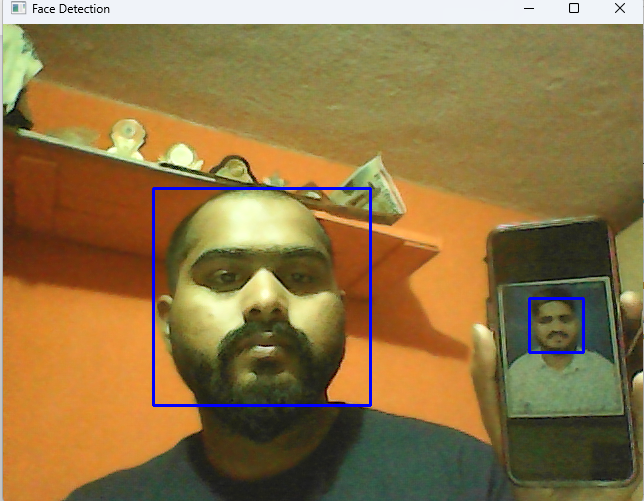

In [15]:
from IPython.display import display, Image

# Specify the correct path to your PNG file with the correct extension
png_path = 'Face_detaction_output.png'

# Display the PNG file
display(Image(filename=png_path))


***After running the def function code,a window called Face Detection appear on my screen:***

The algorithm should track your face and create a blue bounding box around it regardless of where you move within the frame.

In the frame above, the model recognizes my face and my Brother's picture on the phone I’m holding up.

You can also test the efficacy of this model by holding up multiple pictures or by getting different people to stand at various angles behind the camera. The model should be able to identify all human faces in different backgrounds or lighting settings.

***If you’d like to exit the program, you can press the “q” key on your keyboard to break out of the loop.***